In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

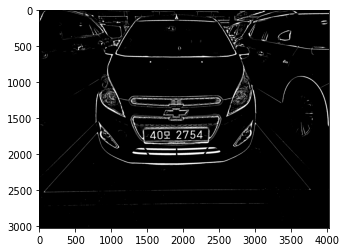

In [150]:
img = cv2.imread('sample/080.jpg', cv2.IMREAD_GRAYSCALE)
img = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,51, 37)
white = 255-(255 * (img > 100)).astype(np.uint8)
plt.imshow(white, cmap = 'gray')


In [151]:
edges = cv2.Canny(white,250,250)
connectivity = 20
num_labels, labelmap, stats, centers = cv2.connectedComponentsWithStats(edges, connectivity, cv2.CV_32S)


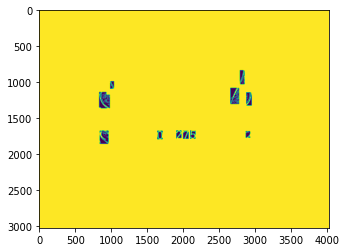

In [152]:
map = np.zeros_like(img)
map2 = np.ones_like(img)*255
avg_w, avg_h, avg_y, n = 0, 0, 0, 0
new_label = []
for l in range(1, num_labels):
    x, y, width, height, pels = stats[l]
    if (0.2*height <= width <= 0.7*height) and width * height> 5000 : #비율과 크기 확인
        crop = white[y:y+height,x:x+width]
        th = 0.2
        if(crop.mean() > 255 * th and crop.mean() < 255 * (1-th)):
            map[labelmap==l] = 255
            map2[y:y+height,x:x+width] = crop
            avg_w += width
            avg_h += height
            avg_y += y
            n += 1
            new_label.append(stats[l])
new_label = np.array(new_label)
plt.imshow(map2)


In [166]:
(np.abs(new_label[:,1].reshape(1,-1) - new_label[:,1].reshape(-1,1))<30).sum(axis = 0)>4

array([False, False, False, False, False, False,  True,  True,  True,
        True,  True,  True,  True])

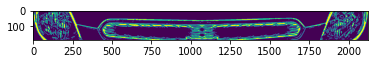

In [153]:
    x_argmax = new_label[:,0].argmax()
    x_argmin = new_label[:,0].argmin()

    lb = new_label[x_argmin,:2]
    rt = new_label[x_argmax,:2] + new_label[x_argmax,2:4]

    result = white[lb[1]:rt[1],lb[0]:rt[0]]
    plt.imshow(result)